# Temperature NN

### Imports

In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
from generate_temp_nn_data import GenerateData

### Generate Training Data and Test Data

In [42]:
generate = GenerateData(1000,500)

--- 0.1545426845550537 seconds ---


0


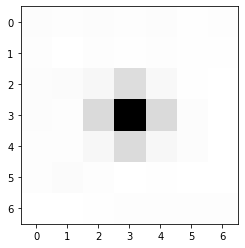

In [43]:
plt.imshow(generate.x_test[1],cmap=plt.cm.binary)
print(generate.y_test[1])

### Compile Basic Feed Forward NN

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


### Train

In [45]:
model.fit(generate.x_train,generate.y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.9570
Epoch 2/10
 1/32 [..............................] - ETA: 0s - loss: 2.7227e-04 - accuracy: 1.0000

2022-07-22 16:25:21.201104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 3ms/step - loss: 1.1519e-04 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 6.3463e-05 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 5.5997e-05 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 5.0373e-05 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 4.5463e-05 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 4.1132e-05 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 3.7305e-05 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 3.3916e-05 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 3.0916e-05 - accuracy: 1.0000


### Evaluate Loss and Accuracy on Test Set

In [46]:
val_loss, val_acc = model.evaluate(generate.x_test,generate.y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

16/16 [==============================] - 0s 4ms/step - loss: 3.0380e-05 - accuracy: 1.0000
loss:  3.0379762392840348e-05 
 accuracy:  1.0


2022-07-22 16:25:24.115827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [47]:
model.save('num_model')
new_model = tf.keras.models.load_model('num_model')
print(np.shape(generate.x_test))
predictions = new_model.predict(generate.x_test)

INFO:tensorflow:Assets written to: num_model/assets
(500, 7, 7)
16/16 [==============================] - 0s 1ms/step


2022-07-22 16:25:26.540791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0
0


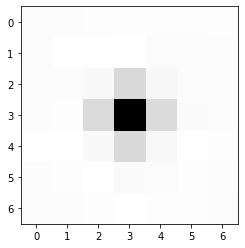

In [52]:
print(np.argmax(predictions[10]))
plt.imshow(generate.x_test[10],cmap=plt.cm.binary)
print(generate.y_test[10])